# Data Cleaning

As a Data Scientist, you will spent most time on data cleaning. It is a process which can be annoying some times and definitely one you have to do over and over and over again. But it is also one of the most important steps of the data science lifecycle since it determines the quality of your data. Remember the "garbage in, garbage out" concept! Therefore it has a huge impact on your prediction model later on and is time well spent. Most of the data you will see in this course is already pretty much cleaned up for modelling. In a business context, this is usually not the case.

In this notebook we will learn a few tools which can be helpful while cleaning your data. Also we will learn some techniques how to handle missing data.

## Learning Objectives

At the end of this notebook you will be able to:

* inspect your data and use the general pandas function for the first analyses
* handle missing data and use some imputing techniques
* know when to drop data
* transform your data.

## Preliminary data cleaning

As it gets probably usual by now, we import our most needed libraries.

In [5]:
import numpy as np
import pandas as pd

Let's load the data from `seattle-weather_raw.csv` into a pandas data frame. You might already know this dataset from the pandas exercises notebooks. We gave you the dataset preprocessed. Now it's the raw file and we need to give it some thought to clean it up.

In [6]:
# importing raw data
df = pd.read_csv('data/seattle-weather_raw.csv')

> **Exercise:**
>
> Get a quick overview of the data. Use the learned pandas methods like `.head()`, `.tail()`, `.info()` and `.describe()`. Is there anything you notice? What would you address in the data cleaning process?

<details><summary>
Click here for a hint…
</summary>
Do you see some:
  
    - formatting problems in the column names?
    - duplicates? 
    - missing values? (what is the reason? and what can you do about it?)
    - inconsistency in the meaning of data?
    - different unit for data?
    - different data types than expected?
    - obvious outliers/ unexpected values?
</details>


In [7]:
# your code: check for data types and statistics overview of data frame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1498 non-null   object 
 1   Precipitation  1396 non-null   object 
 2   Temp Max       1144 non-null   float64
 3   Temp Min       1498 non-null   object 
 4   Wind           1498 non-null   float64
 5   -              1498 non-null   object 
dtypes: float64(2), object(4)
memory usage: 70.3+ KB


In [9]:
df_weather = df

Let's get started!

## Fix column names formats

As you are probably aware of, we have to change the column names. As already explained in earlier notebooks, it is always a good idea to change the empty spaces to underscores. Also it is recommended to use only low letters in the column names. Furthermore the last column has no name.

One way to change the names is to write the actual names into a list, editing them and transfer the list back to the data frame, as it is explained in the pandas notebooks. But it is also possible to edit the column names in the data frame directly. Of course in the end you can use the way which you feel is the most comfortable.

The `.str` function allows you to use string functions on a data frame column. We can use that to simply replace empty spaces with an underscore.

In [10]:
# replacing empty spaces with underscores in column names
df_weather.columns = df_weather.columns.str.replace(' ','_')
df_weather.columns

Index(['Date', 'Precipitation', 'Temp_Max', 'Temp_Min', 'Wind', '-'], dtype='object')

In the same way we can just simply tell our data frame to only use lower cases for our column names.

In [11]:
# changing all column names to lower case
df_weather.columns = df_weather.columns.str.lower()
df_weather.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', '-'], dtype='object')

We also could use `.str` for renaming the last column name. But pandas has already the `.rename` function build in. That way we can iterate directly into the column names and only need a dictionary to change the names.

In [12]:
# renaming last column
df_weather = df_weather.rename({'-':'weather'},axis=1)
df_weather.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

Congratulations. You just finished the first step of cleaning this data frame. Let's have another look at the first rows again. What else can you see which is odd?

In [13]:
df_weather.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,41.0 F,4.710858,drizzle
1,2012/01/02,10.9,NaN,37.04 F,4.527453,r
2,2012/01/03,0.8,11.7,44.96 F,2.315752,r.
3,2012/01/03,0.8,11.7,44.96 F,2.315752,r.
4,2012/01/04,20.3,12.2,42.08 F,4.719543,r


## Dealing with duplicates

The rows with index $2$ and $3$ are identical. There are obviously duplicated which can happen for example while merging two data frames together. The function `.duplicated()` returns a boolean pandas Series which tells you if a row is a duplicate or not. Combined with another well known function it will tell us how many duplicated rows we have.

In [14]:
# check how many duplicated rows exist in the data frame
df_weather.duplicated().value_counts()

False    1461
True       37
Name: count, dtype: int64

As you can see we have 37 duplicated rows. Those rows can be easily dropped. Furthermore we have to drop the old index and renew them.

In [15]:
# remove duplicates
df_weather = df_weather.drop_duplicates()
# reset index inplace
df_weather.reset_index(inplace=True, drop=True)
df_weather.tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015/12/27,8.6,4.4,35.06 F,2.927153,Fog
1457,2015/12/28,1.5,5.0,35.06 F,1.314164,Fog
1458,2015/12/29,0.0,7.2,33.08 F,2.603683,Fog
1459,2015/12/30,0.0,5.6,30.2 F,3.436422,s.
1460,2015/12/31,0.0,NaN,28.22 F,3.517035,sun


## Data Types and Transforming Data

One Part of Data Cleaning is to get the data types into the right shape. This is import so we can work better with the data later on. The dtype `object` means that there are several data types in the corresponding column.

In [16]:
# check data types in data frame
df_weather.dtypes

date              object
precipitation     object
temp_max         float64
temp_min          object
wind             float64
weather           object
dtype: object

Let's go through the column list and start at the beginning with the **Date** column. At the moment it has the data type `Object`. We will look at this more closely to see what data type Pandas identifies our current date entry as. To do this, we can simply take the first entry.

In [17]:
# type of first date entry
type(df_weather['date'][0])

str

As you can see our date entry is just a string. We can change that to a date time very easy as we already learned. Note that you also could do that in the beginning, when you read in the csv file with the parameter `parse_date=['date']`.

In [18]:
# change "date" dtype to datetime with format %Y/%m/%d
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y/%m/%d')
df_weather['date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

A quick check if that worked:

In [19]:
# check "date" dtype
type(df_weather['date'][0])

pandas._libs.tslibs.timestamps.Timestamp


Moving on to the column **precipitation**. At the look of the data frames head, we would have expected a float datatype. This is actually an indication, that there is more than just numbers in this column. For now we could just try to convert the column to the float type, also this might not work.

In [20]:
# change data type to float
df_weather = df_weather.astype({'precipitation': float})

ValueError: could not convert string to float: '$': Error while type casting for column 'precipitation'

As expected we get an error message. However this can help us to determine why our column cannot be assigned to the data type `float`. If we read the message it tells us in the last line that we can not convert a string to a float. Also now we know the cause of our error. Somewhere in this column is a `$`-character hidden. Out of curiosity let's try to find it.

In [21]:
# display rows with "$" in precipitation column
df_weather.query('precipitation == "$"') # interesting syntax

,date,precipitation,temp_max,temp_min,wind,weather
1130,2015-02-04,$,10.6,39.92 F,1.705199,f


It is only one `$`-character in line $1130$. We can easily replace the `$`-character with a numpy nan value. nan stands for "Not a Number" and is used as a placeholder for missing values. Afterwards we are able to convert our column data type.

In [22]:
#replace the `$`-character with a numpy NaN value
df_weather['precipitation'] = df_weather.precipitation.replace('$',np.nan) # remember np.nan
# change data type to float
df_weather = df_weather.astype({'precipitation': float})
df_weather.precipitation.dtypes

dtype('float64')

Looking at our data types and the table head again, the `temp_max`-column looks good. But if we continue with `temp_min` we will notice two things. First there are not only numbers in `temp_min` (dtype is detected as object) and the minimum temperature is larger as the maximum temperature. We can assume that somehow the units of the temperature got mixed up. The maximum temperature is in Celsius while the minimum is appearing to be in Fahrenheit. To fix that we can first delete the unit from the number and change the data type.

In [31]:
# remove unit from "temp_min" column, change dtype to float
df_weather['temp_min'] = df_weather.temp_min.str.strip(' F').astype('float')
df_weather.temp_min.dtype

dtype('float64')

Now that we have floats in our column we can convert the temperature from Fahrenheit to Celsius.

In [32]:
# convert temp_min to celsius
df_weather['temp_min'] = df_weather.temp_min.astype(float).apply(lambda x: (x-32)/1.8)
df_weather.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.710858,drizzle
1,2012-01-02,10.9,NaN,2.8,4.527453,r
2,2012-01-03,0.8,11.7,7.2,2.315752,r.
3,2012-01-04,20.3,12.2,5.6,4.719543,r
4,2012-01-05,1.3,NaN,2.8,6.124592,rain


That is much better. Also the minimum temperature is now smaller than the maximum temperature.

For the "Wind" column, the data type is already as it should be. However, you should round these numbers for the future. It might be good to have a few decimal places for future modelling, but it is not always necessary to be so precise. Let's therefor try rounding these numbers for practice purposes.

In [33]:
# rounding wind data
df_weather['wind'] = df_weather.wind.round(2)
df_weather.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.71,drizzle
1,2012-01-02,10.9,NaN,2.8,4.53,r
2,2012-01-03,0.8,11.7,7.2,2.32,r.
3,2012-01-04,20.3,12.2,5.6,4.72,r
4,2012-01-05,1.3,NaN,2.8,6.12,rain


Last column doesn't contain a number but a string, which describes the type of weather. That kind of data is called a categorical value. We can find out how many categorical values there are.


In [164]:
# display number of distinct elements
df_weather.weather.nunique()

1

That is quite a lot, but also as you may noticed not accurate. We have various entries which mean the same thing.

In [34]:
#display all distinct elements
df_weather['weather'].unique()

array(['drizzle', 'r', 'r.', 'rain', 's', 'Rain', 'sun', 'Sun', 'Snow',
       'sn.', 'sw', 'd', 's.', 'driz.', 'snow', 'Drizzle', 'Fog', 'f',
       'f.', 'fog'], dtype=object)

Looking at the unique values, we see that "drizzle", "d", "d." and "drizzle" all probably represent the same category. So one category has several values. This often happens if there is no fixed standard for data collection. We need to reduce the number of values for each category to one. The easiest and safest way is to manually assign each value to the appropriate category. The implemented function `.map` uses either a dictionary to assign a value to it's new one or a function, which is applied on each value. In our case we will use the dictionary.

> Note: Sometimes it can happen that abbreviations are ambiguous. For example, there is a category "sn" which could represent either "snow" or "sun". Here it is worth diving deeper into the data collection process to make a more informed decision.

> <sup>Note: you could also use pattern match (which uses regular expressions) or fuzzy matching to approach this task. But they are more complicated to program and an absolute understanding of them is mandatory, because there is a risk of assigning a value to the wrong category.</sup>

In [36]:
# reducing number of categorical values by mapping with a word-dictionary 
df_weather['weather'] = df_weather['weather'].map({  # default in .map id replacing missing matches with NaN
    'drizzle': 'drizzle',
    'r': 'rain', 
    'r.': 'rain',
    'rain' : 'rain',
    's': 'sun',
    'Rain': 'rain',  
    'sun': 'sun',
    'Sun': 'sun',
    'Snow': 'snow',
    'sn.': 'snow', 
    'sw': 'snow',
    'd': 'drizzle', 
    's.': 'sun',
    'driz.': 'drizzle', 
    'snow': 'snow',
    'Drizzle': 'drizzle', 
    'Fog': 'fog',
    'f': 'fog',
    'f.': 'fog', 
    'fog': 'fog'
    }) # possibility to set default for missing
df_weather.weather.unique()


array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

We can convert the data type from this column to `string` just as easily as before. Note that this is not mandatory going forward.

In [37]:
# convert to dtype "string"
df_weather['weather'] = df_weather.weather.astype('string')
df_weather.weather.dtype

string[python]

## Missing Data and Imputing

Missing data is a common problem when working with real data sets. The reasons for missing data can be manifold, e.g. sensor failures, old data, improper data management and even human error. 

It is important that missing data is identified and dealt with appropriately before further data analysis or machine learning. Many machine learning algorithms cannot handle missing data and require that entire rows or columns where a single missing value is present be deleted. Or missing data has to be replaced (imputed) with a new value.

Knowing when missing data occurs can help avoid missing values in the future, or help in dealing with them.
There is a great python library for doing some EDA specifically for missing data, called **[missingno](https://github.com/ResidentMario/missingno)**. (Do not confuse it with the pokemon of the same name.)

<img src="https://www.pokewiki.de/images/2/28/Tokiya_Missingno.jpg" alt="drawing" style="width:250px;"/>



In [38]:
# import missingno
import missingno as msno

We can have a look at how many values are missing per column in our data.

In [39]:
# display number of missing values per column
df_weather.isna().sum()

date               0
precipitation    101
temp_max         349
temp_min           0
wind               0
weather            0
dtype: int64

With missingno we can simply display these values as missing percentages per column in a bar chart. Each bar represents one column. On the left side we see the percentage of data present, on the right side we see the exact number of values that correspond to these percentages.

<Axes: >

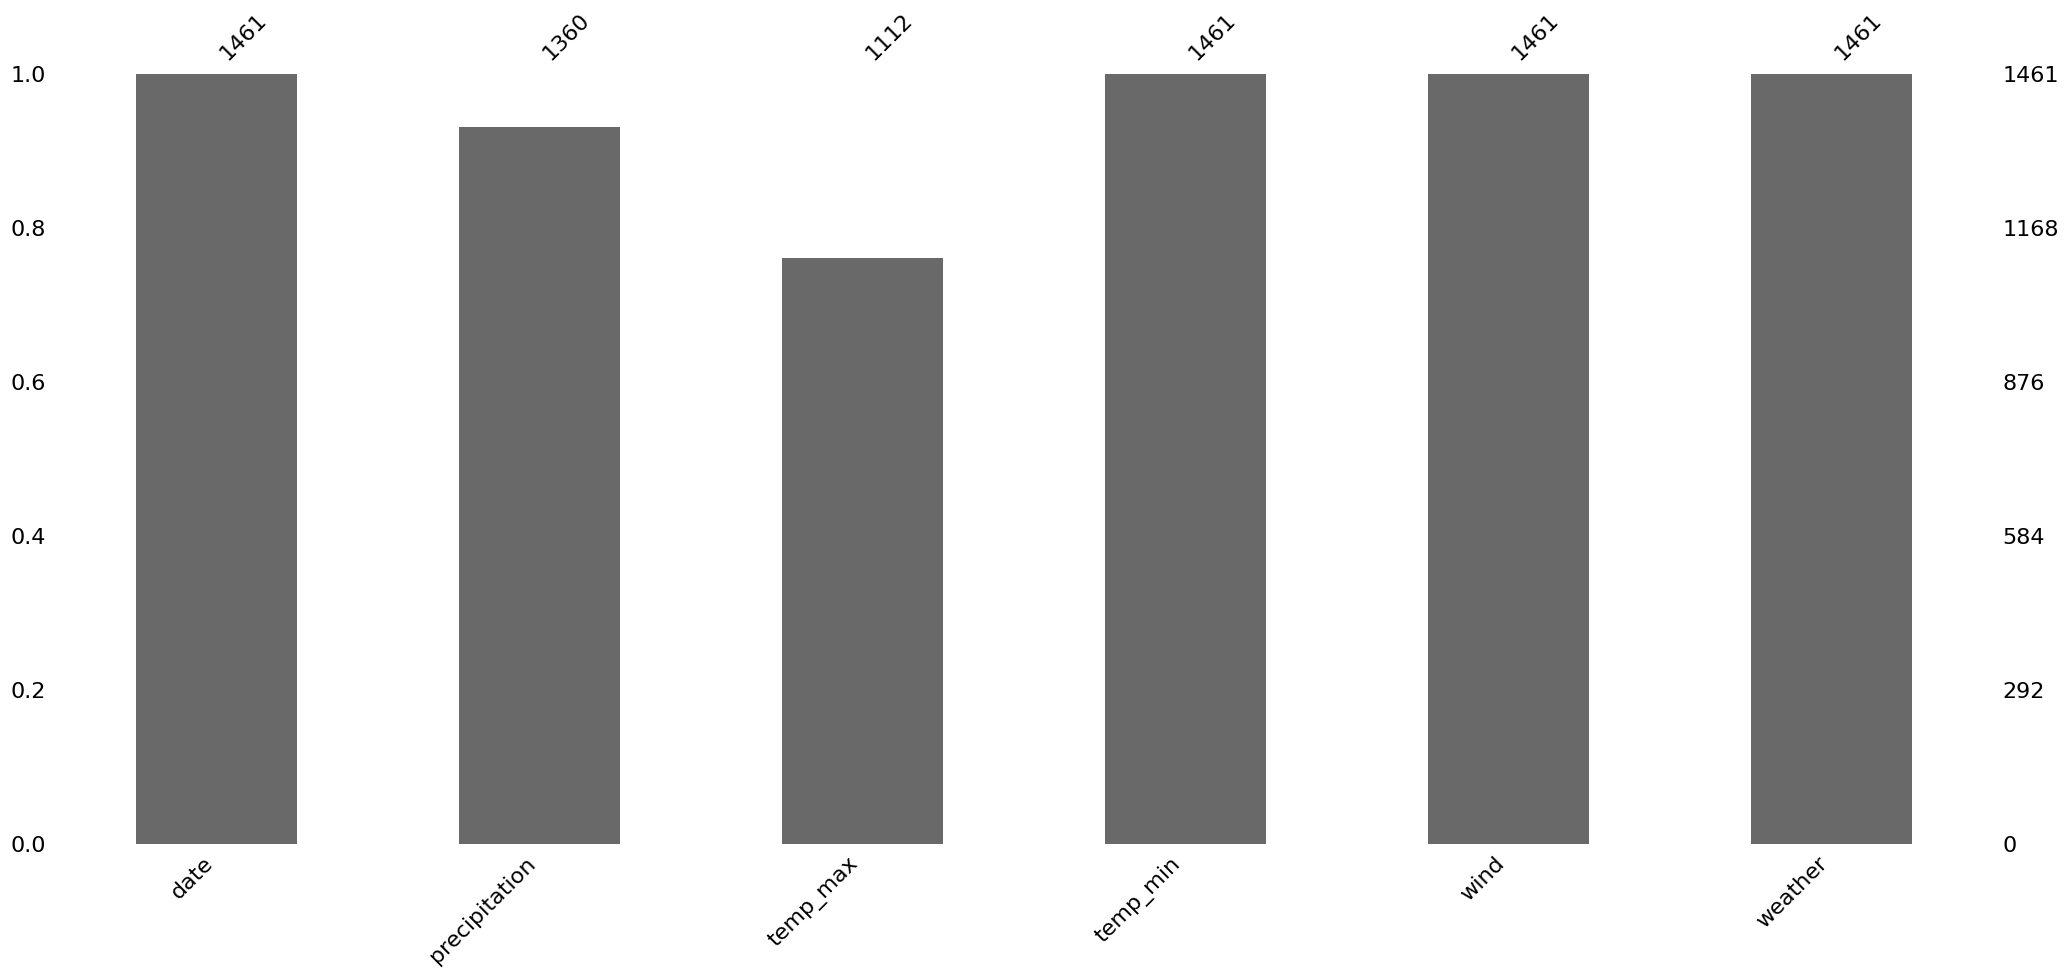

In [40]:
# plotting percentage of missing values per column
msno.bar(df_weather)

We see that only two columns contain missing values: More than 20 % of the data is missing in the column "temp_max". Less than 10 % of the data is missing in the column "precipitation". It would be interesting to know if there is a pattern in the occurrence of the missing values. This would help us understand where they are coming from. For example, it could be that these values are not collected on Sunday. Then we would have a missing value in every 7th row. It could also show us a period when our instrument stopped working, which would then lead to successive missing values. All this helps us to understand our data better and to correct errors if necessary.

With missingno you can also print a matrix plot. For each row in the dataset you can see if data is missing in each column. When data is present, the plot is shaded in grey (or your color of choice), and when it is absent the plot is displayed in white. This gives you an view how that missing data is distributed in the data frame. And if they occur together.

<Axes: >

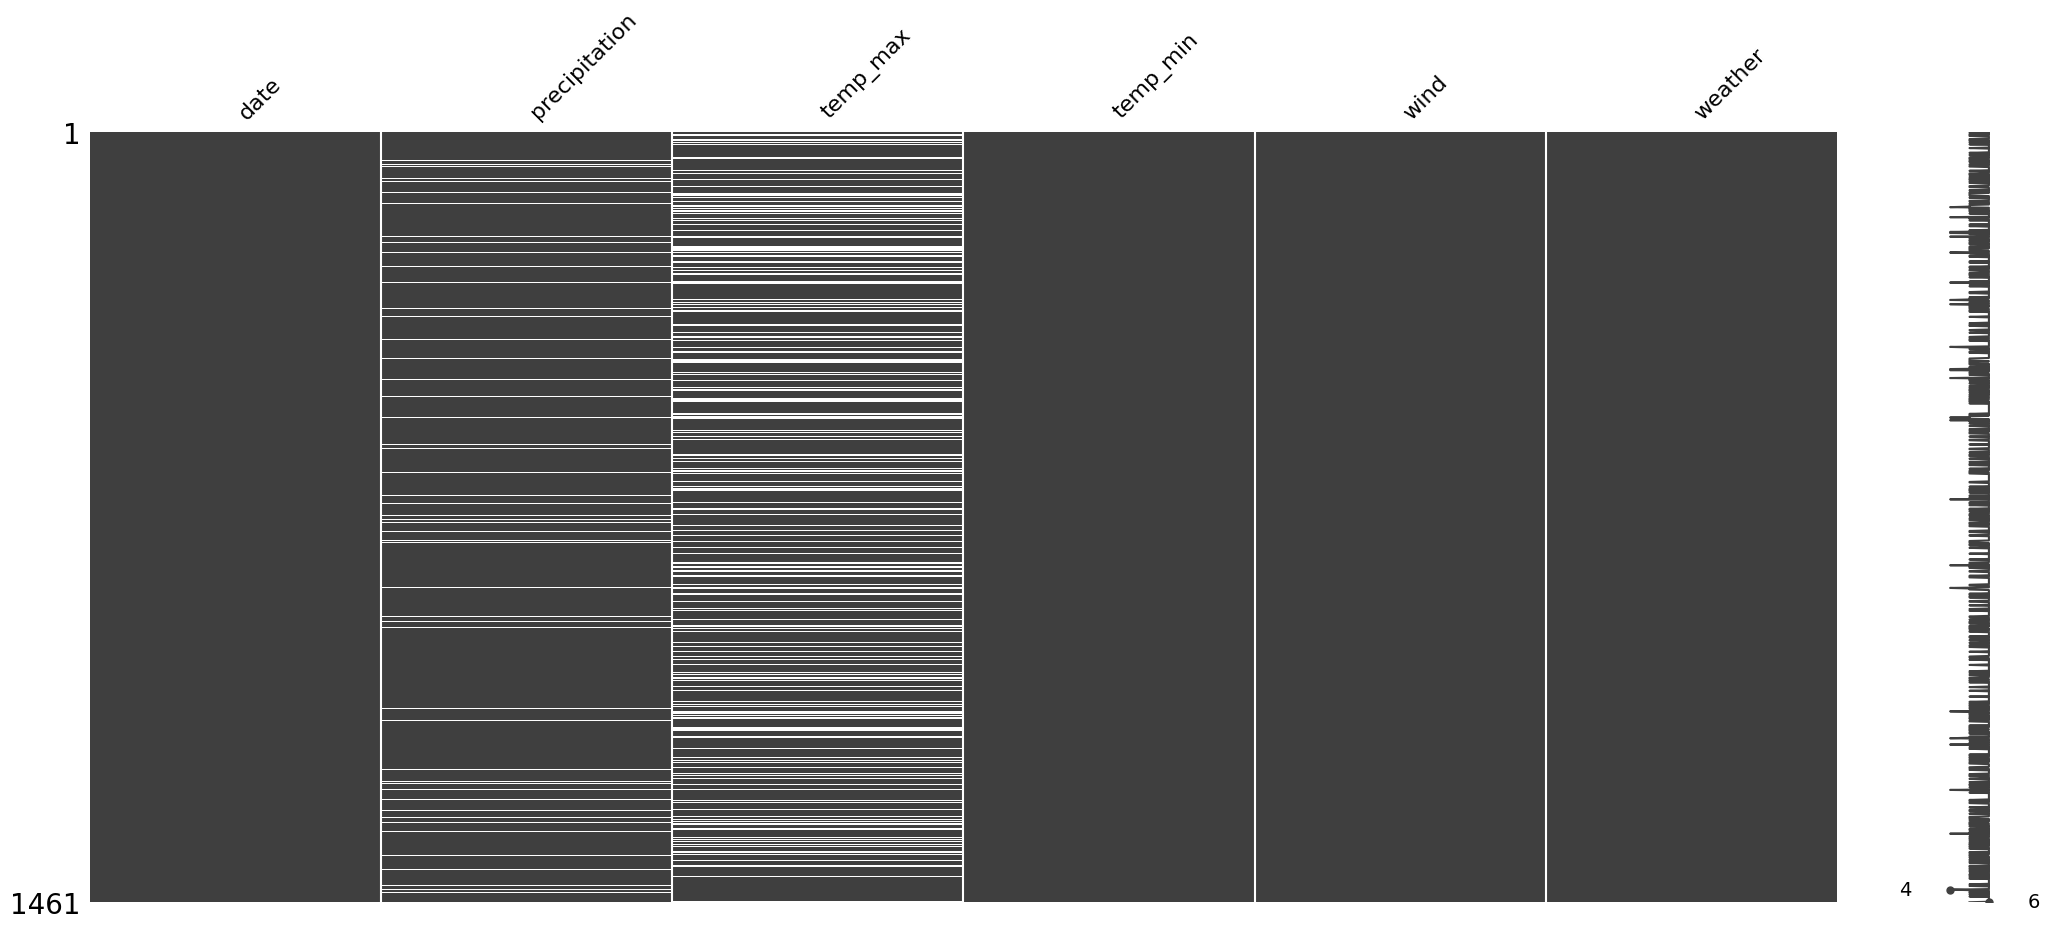

In [41]:
msno.matrix(df_weather)

On the right hand side you can see for each **row** how many columns contain data. In our case, the range is from 4 columns with data (left) to 6 columns with data (right). As you can see, there are not many rows where missing values occur together. And overall, there is no clear pattern in the missing data. Therefore, we have to assume, that the missing data occurs randomly. Which is not helping us at all on how to best treat this missing values. 

Missingno has more plots to investigate missing values. For example, you can also create a heatmap to see how often missing values in specific features occur together. Check out the repo for more insights!

### Imputing Data

Missing Data and Imputing are big topics in data science. Imputing means to replace missing values with sensible values. There are several imputing techniques that we will familiarize ourselves with in this notebook. When you impute missing values, you are manipulating the data and this can have a significant impact on the quality of the data.  Hence you need to have a certain level of knowledge about your data in order to find a good solution and the approach that is best suited for the task at hand. As usual in data science, there is no one solution that fits all problems. Imputation of data ranges from fairly simple to highly complex strategies. Remember that the work of a data scientist progresses in cycles. It is always best to start with a simple approach and become more complex with each cycle. With this in mind, your pre-processing will only become more complex and thus more time-consuming if it really provides more value.

The first step is always to determine how many missing data you got. Since we already identified all our missing data above, we only have to use one command.

> Exercise: Time for brainstorming! What could be reasons for missing values and what different ways of dealing with missing data can you think of? Are these possibilities dependent on the reasons of missing values?

### Dropping data

Dropping data is the easiest and fastest option. But this is only recommended if there’s a lot of data to start with and the percentage of missing values is low. There are multiple ways to drop your data. You could drop the rows which have missing values in them or even drop a whole column.

Though you could end up with little data if you have too much missing data. You also could loose some (valuable) information or maybe evan change the representation of some data if the rows with missing values have something in common and are not totally random. Hence you should always be mindful about dropping your data.

In our case we have only 2 columns with missing values and the amount doesn't seem too much. But let's put those numbers in context.

In [45]:
print(f"numbers of rows : {df_weather.shape[0]}")
print(f"missing values in precipitation : {round(df_weather.precipitation.isna().sum()/df_weather.shape[0]*100,2)} %")
print(f"missing values in temp_max : {round(df_weather.temp_max.isna().sum()/df_weather.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df_weather.isna().sum().sum()/(df_weather.shape[0]*df_weather.shape[1])*100,2)} %")


numbers of rows : 1461
missing values in precipitation : 6.91 %
missing values in temp_max : 23.89 %
missing values in data frame : 5.13 %


We have 1461 rows and about one quarter of them have missing values in at least one column. This would actual be too much to drop. Fortunately there are more ways of imputing. But for a start dropping is still a possibility.

Pandas has a function for dropping missing values. You will find a description and an explanation for a few attributes in the following table:

`dropna` | description
---|---
`.dropna()` | drops row if contains at least 1 NaN
`.dropna(how='all')` | drops row if all entries are filled with NaN
`.dropna(thresh=2)` | drops row if there are less than 2 cells filled with a valid value

You can also checkout the [documentation for `dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

> **Exercise:** Since we also want to show you other ways of imputing in this notebook, make a copy of our dataset. After that use `.dropna` on our copied data set. Try at least two different ways.


In [50]:
# create a copy of the dataset
df2 = df_weather.copy()
df2

#drop all rows if they contain at least one missing value (in any column)
df3 = df2.dropna()
df3

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.71,drizzle
2,2012-01-03,0.8,11.7,7.2,2.32,rain
3,2012-01-04,20.3,12.2,5.6,4.72,rain
5,2012-01-06,2.5,4.4,2.2,2.22,rain
8,2012-01-09,4.3,9.4,5.0,3.44,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.50,sun
1456,2015-12-27,8.6,4.4,1.7,2.93,fog
1457,2015-12-28,1.5,5.0,1.7,1.31,fog
1458,2015-12-29,0.0,7.2,0.6,2.60,fog


### Imputing with a constant

#### Flag the missing value

Sometimes even a missing value can be informative. For example if you asking a proband for their sex and give them only the option of ticking female or male and their define them selfs as queer, it might conclude in a missing value. You could assume and assign that value to `other` or another categorical value.
For our case we could assign a unique value. For precipitation and temperature this would be a really high absolute value.

#### Mean/Median/Mode imputation

One popular technic of imputing is to take the mean, median or mode value of the column. Which one of those three to take depends on the issue you are dealing with. For example if you are having a categorical value (like sex: 0 for male, 1 for female), taking the mean value would not make any sense. Also taking the mean for a numerical value could be dangerous since outliers could have a huge impact. In that case taking the median could be a better choice.
Of course it is also possible to take assumptions, for example the weather today is the same weather as the day before.

> <sup>Hint: A visualization plot could help you determining which value to take.</sup>

As you probably already guessed, pandas has an implemented function for the imputing issue:

`fillna` | description
---|---
`df.fillna(0)` | replaces all nan in df with one value
`df.fillna({'precipitation': 0, 'temp_min': 0, 'temp_max': 42, 'wind': 0, 'weather': 'no_weather'})` | replaces nan in specific column with one specific value
`df.fillna(method='ffill')` | use value of the day (row) before (forward fill)
`df.fillna(method='bfill')` | use value of the day (row) after (backward fill)
`df.fillna(method='ffill', axis=1)` | copies values from column before
`df.fillna(method='ffill', limit=1)` | if there are more than 1 value in a row missing, only the next one will be filled with the previous day value, the other one will stay as NaN

You can also checkout the [documentation for `fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

> **Exercise:** Please make a copy from `df_weather` again and fill your missing values. Try at least two methods with `.fillna`. Which values would make sense?

In [69]:
# create a copy of the dataset
exdata = df_weather.copy()

#replace = ({"temp_max": 5000})

exdata.fillna(axis="precipitation", value= 5000)

exdata

# use fillna to impute missing values


ValueError: No axis named precipitation for object type DataFrame

#### Interpolation

The final method we want to try out today is calculating the missing values with an interpolation. An interpolation estimates the course of a continuous function between two known points. From this function we can approximate the missing value.

There are multiple ways of interpolation. The most common and also the easiest for a missing value $x_{i}$ is the linear interpolation, where two data points, $(x_{i-1},y_{i-1})$ and $(x_{i+1},y_{i+1})$, are connected by a straight line.

$$
y_{i} = y_{i-1} + \frac{y_{i+1} - y_{i-1}}{x_{i+1} - x_{i-1}}(x_i - x_{i-1})
$$

In our case the maximum temperature is a perfect example. If we use the default settings of pandas `.interpolate` we would get a linear interpolation with an equal spaced distribution. It is also possible to take the date instead.

> **Exercise:** Please make a copy from `df_weather` again and try to do an interpolation for the missing values in the maximum temperature column. You might want to checkout the [documentation for `interpolate`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [ ]:
# create a copy of the dataset


# interpolate the missing values in temp_max column

Since it is also possible to use splines and polynomials, the interpolation function can be quite powerful. Reading further documentation is absolute necessary to use this function!

### Prediction

It is also possible to predict your missing values. Therefore the column with the missing data would become the target value. The dataset will be split into a set with a valid value for the target which would be used for training and a set with the missing values, for which we would predict. A good model for imputing is KNN. Since we didn't reach the subject of predictive modeling yet, this will only be mentioned at this point.

> **Note:** It is important to prevent any data leakage! When using a model to impute missing data make sure you remove your actual target values! If you impute temp_max, you cannot use the weather columns when your end goal is to predict the weather.
